# EDA Plots for Simulated HH Data

- Reproduce EDA results from Section 2 of *Hierarchical Dynamic Modeling for Individualized Bayesian Forecasting*

## Simulated Data


### Households
**3** Household Groups, with **200** simulated households over **110** weeks
- Household Group 1: high spending and purchasing households (``Data/HH1-DATA.csv``)
- Household Group 2: moderate spending and purchasing households (``Data/HH2-DATA.csv``)
- Household Group 3: low spending and purchasing households (``Data/HH3-DATA.csv``)

### Items

Nested hierarchy of item information (from most general to most specific): Category -> Sub-Category -> Item

Simulated data contains information about **8** Items, from **2** Categories:


| Item      | Sub-Category | Category |
| ----------- | ----------- |----------- |
| A      | 1A       | 1|
| B   | 1A        | 1|
| C   | 1B        | 1|
| D   | 1B        | 1|
| E      | 2A       | 2|
| F   | 2A        | 2|
| G   | 2B        | 2|
| H   | 2B        | 2|

## Covariates / DATA.csv Columns
- ``HH``: household ID (0-199)
- ``WEEK``: week ID (0-109)
- ``CAT``: Category ID (1 or 2)
- ``SUB_CAT``: Sub-category ID (1A, 1B, 2A, or 2B)
- ``ITEM``: Item ID (A, B, C, D, E, F, G, or H)
- ``ITEM_QTY``: Total number of items purchsed 
- ``TOTAL_SPEND``: Total $ spent 
- ``DISCOUNT_PERC``: Discount percentage (discount amound/regular price)

In [156]:
import numpy as np
import pandas as pd
import matplotlib 
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
sns.set(font_scale=2)

## Summary Statistics Table

In [157]:
results = np.zeros((3,4))

## HH Group 1 - High Spending
df_hh1 = pd.read_csv('Data/HH1-DATA.csv')
## Group over all items for global summaries
df1 = df_hh1.groupby(['HH','WEEK']).sum()[['ITEM_QTY', 'TOTAL_SPEND']]
df1['RETURN'] = np.where(df1['ITEM_QTY'] > 0, 1, 0) ## Return column
## Summary Statistics
prop1 = df1['RETURN'].sum()/df1['RETURN'].shape[0]
mean1 = df1.loc[df1['RETURN'] == 1]['TOTAL_SPEND'].mean()
sd1 = df1.loc[df1['RETURN'] == 1]['TOTAL_SPEND'].std()
med1 = df1.loc[df1['RETURN'] == 1]['TOTAL_SPEND'].median()
results[0,:] = np.round(np.array([prop1, mean1, med1, sd1]), 3)

## HH Group 2 - Moderate Spending
df_hh2 = pd.read_csv('Data/HH2-DATA.csv')
## Group over all items for global summaries
df2 = df_hh2.groupby(['HH','WEEK']).sum()[['ITEM_QTY', 'TOTAL_SPEND']]
df2['RETURN'] = np.where(df2['ITEM_QTY'] > 0, 1, 0) ## Return column
## Summary Statistics
prop2 = df2['RETURN'].sum()/df2['RETURN'].shape[0]
mean2 = df2.loc[df2['RETURN'] == 1]['TOTAL_SPEND'].mean()
sd2 = df2.loc[df2['RETURN'] == 1]['TOTAL_SPEND'].std()
med2 = df2.loc[df2['RETURN'] == 1]['TOTAL_SPEND'].median()
results[1,:] = np.round(np.array([prop2, mean2, med2, sd2]), 3)

## HH Group 3 - Low Spending
df_hh3 = pd.read_csv('Data/HH3-DATA.csv')
## Group over all items for global summaries
df3 = df_hh3.groupby(['HH','WEEK']).sum()[['ITEM_QTY', 'TOTAL_SPEND']]
df3['RETURN'] = np.where(df3['ITEM_QTY'] > 0, 1, 0) ## Return column
## Summary Statistics
prop3 = df3['RETURN'].sum()/df3['RETURN'].shape[0]
mean3 = df3.loc[df3['RETURN'] == 1]['TOTAL_SPEND'].mean()
sd3 = df3.loc[df3['RETURN'] == 1]['TOTAL_SPEND'].std()
med3 = df3.loc[df3['RETURN'] == 1]['TOTAL_SPEND'].median()
results[2,:] = np.round(np.array([prop3, mean3, med3, sd3]), 3)

df_summ = pd.DataFrame(results)
df_summ.columns = ['Proportion', 'Mean', 'Median', 'Std. Dev.']
df_summ.index = ['HH-1', 'HH-2', 'HH-3']
df_summ

,Proportion,Mean,Median,Std. Dev.
HH-1,0.896,10.882,8.48,9.179
HH-2,0.770,6.573,5.31,4.817
HH-3,0.616,4.829,3.65,3.296


Plot mutiple households, for Item A

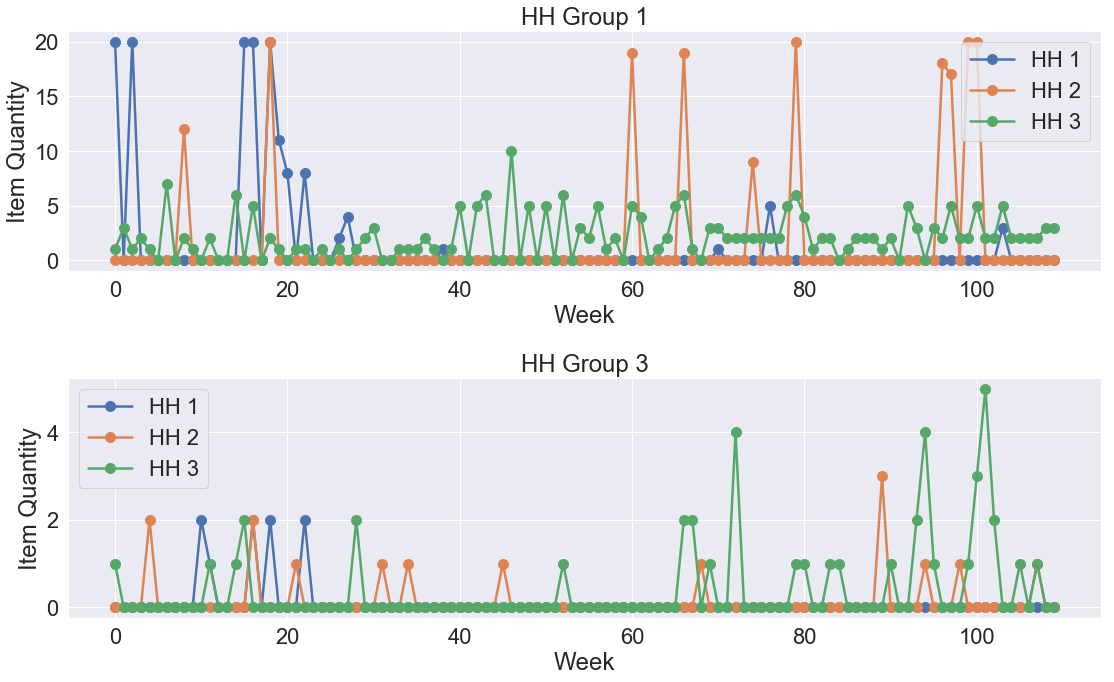

In [158]:
## Plot multiple HHs, 1 item
df_item1 = df_hh1[df_hh1['ITEM'] == 'A']
df_item3 = df_hh3[df_hh3['ITEM'] == 'A']

plt.figure(figsize = (16,10))
plt.subplot(2,1,1)
plt.title('HH Group 1')
plt.plot(df_item1['ITEM_QTY'][df_item1['HH'] == 2].values, marker='o', label = 'HH 1',
        linewidth = 2.5, markersize = 10)
plt.plot(df_item1['ITEM_QTY'][df_item1['HH'] == 10].values, marker='o', label = 'HH 2',
        linewidth = 2.5, markersize = 10)
plt.plot(df_item1['ITEM_QTY'][df_item1['HH'] == 100].values, marker='o', label = 'HH 3',
        linewidth = 2.5, markersize = 10)
plt.xlabel('Week')
plt.ylabel('Item Quantity')
plt.legend()
plt.subplot(2,1,2)
plt.title('HH Group 3')
plt.plot(df_item3['ITEM_QTY'][df_item3['HH'] == 2].values, marker='o', label = 'HH 1',
        linewidth = 2.5, markersize = 10)
plt.plot(df_item3['ITEM_QTY'][df_item3['HH'] == 10].values, marker='o', label = 'HH 2',
        linewidth = 2.5, markersize = 10)
plt.plot(df_item3['ITEM_QTY'][df_item3['HH'] == 100].values, marker='o', label = 'HH 3',
        linewidth = 2.5, markersize = 10)
plt.xlabel('Week')
plt.ylabel('Item Quantity')
plt.legend()
plt.tight_layout()
fname = 'Plots/EDA-HHs-1item.png'
plt.savefig(fname)
plt.show()

Item Quantity vs. Discount Amount

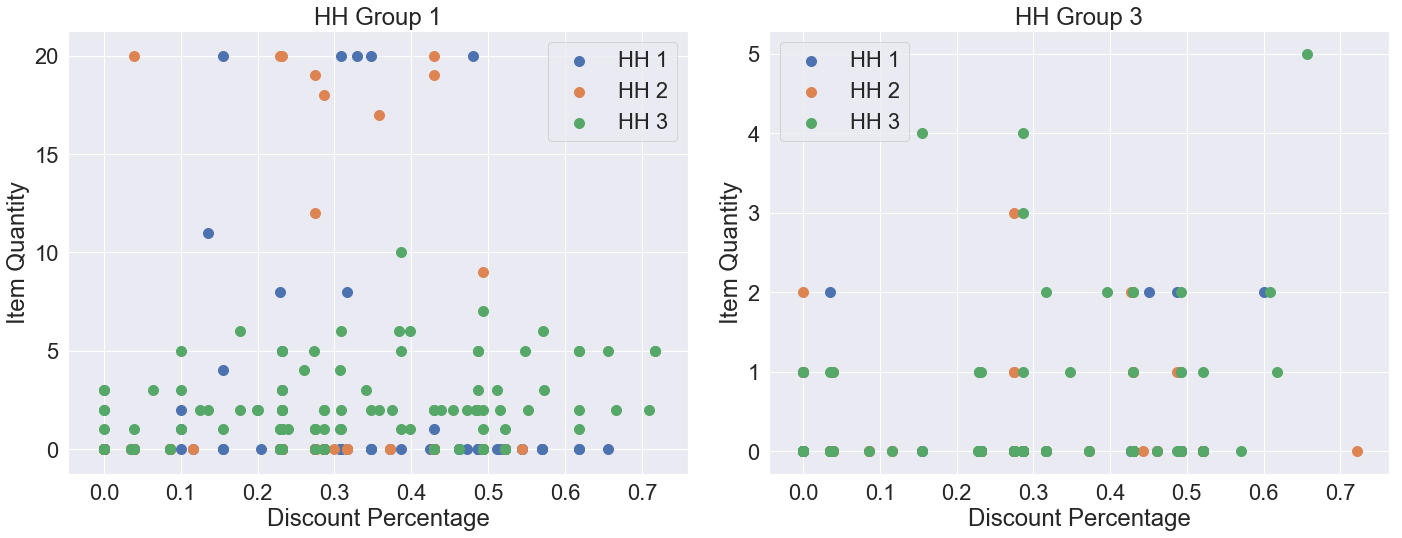

In [159]:
### Plot ITEM QTY vs. DISCOUNT AMOUNT
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('HH Group 1')
plt.scatter(df_item1['DISCOUNT_PERC'][df_item1['HH'] == 2].values, 
            df_item1['ITEM_QTY'][df_item1['HH'] == 2].values,
            marker='o', label = 'HH 1', s = 100)
plt.scatter(df_item1['DISCOUNT_PERC'][df_item1['HH'] == 10].values, 
            df_item1['ITEM_QTY'][df_item1['HH'] == 10].values,
            marker='o', label = 'HH 2', s = 100)
plt.scatter(df_item1['DISCOUNT_PERC'][df_item1['HH'] == 100].values, 
            df_item1['ITEM_QTY'][df_item1['HH'] == 100].values,
            marker='o', label = 'HH 3', s = 100)
plt.xlabel('Discount Percentage')
plt.ylabel('Item Quantity')
plt.legend()
plt.tight_layout()
plt.subplot(1,2,2)
plt.title('HH Group 3')
plt.scatter(df_item3['DISCOUNT_PERC'][df_item3['HH'] == 2].values, 
            df_item3['ITEM_QTY'][df_item3['HH'] == 2].values,
            marker='o', label = 'HH 1', s = 100)
plt.scatter(df_item3['DISCOUNT_PERC'][df_item3['HH'] == 10].values, 
            df_item3['ITEM_QTY'][df_item3['HH'] == 10].values,
            marker='o', label = 'HH 2', s = 100)
plt.scatter(df_item3['DISCOUNT_PERC'][df_item3['HH'] == 100].values, 
            df_item3['ITEM_QTY'][df_item3['HH'] == 100].values,
            marker='o', label = 'HH 3', s = 100)
plt.xlabel('Discount Percentage')
plt.ylabel('Item Quantity')
plt.legend()
plt.tight_layout()
fname = 'Plots/EDA-HHs-discountvsqty.png'
plt.savefig(fname)

Multiple Items for one Household

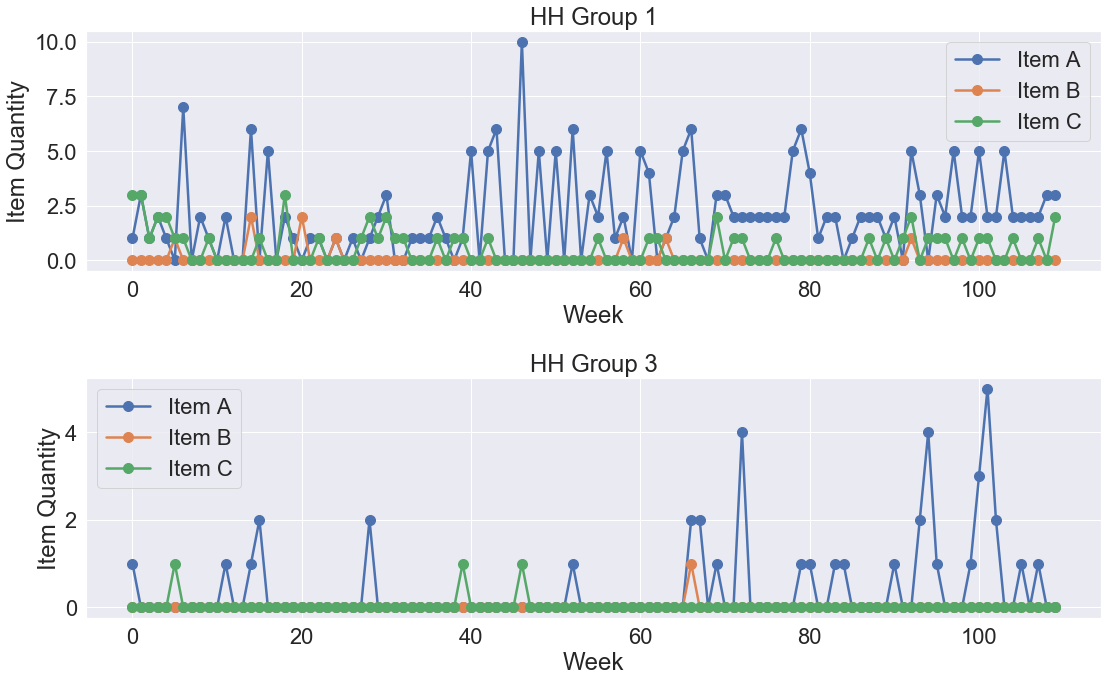

In [160]:
## plot multiple items, 1 HH
df_item1 = df_hh1.loc[df_hh1['HH'] == 100]
df_item3 = df_hh3.loc[df_hh3['HH'] == 100]

plt.figure(figsize = (16,10))
plt.subplot(2,1,1)
plt.title('HH Group 1')
plt.plot(df_item1['ITEM_QTY'][df_item1['ITEM'] == 'A'].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Item A')
plt.plot(df_item1['ITEM_QTY'][df_item1['ITEM'] == 'B'].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Item B')
plt.plot(df_item1['ITEM_QTY'][df_item1['ITEM'] == 'C'].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Item C')
plt.xlabel('Week')
plt.ylabel('Item Quantity')
plt.legend()
## HH group 3
plt.subplot(2,1,2)
plt.title('HH Group 3')
plt.plot(df_item3['ITEM_QTY'][df_item3['ITEM'] == 'A'].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Item A')
plt.plot(df_item3['ITEM_QTY'][df_item3['ITEM'] == 'B'].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Item B')
plt.plot(df_item3['ITEM_QTY'][df_item3['ITEM'] == 'C'].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Item C')
plt.xlabel('Week')
plt.ylabel('Item Quantity')
plt.legend()
plt.tight_layout()
fname = 'Plots/EDA-Items-1HH.png'
plt.savefig(fname)

Plots at Category Level 

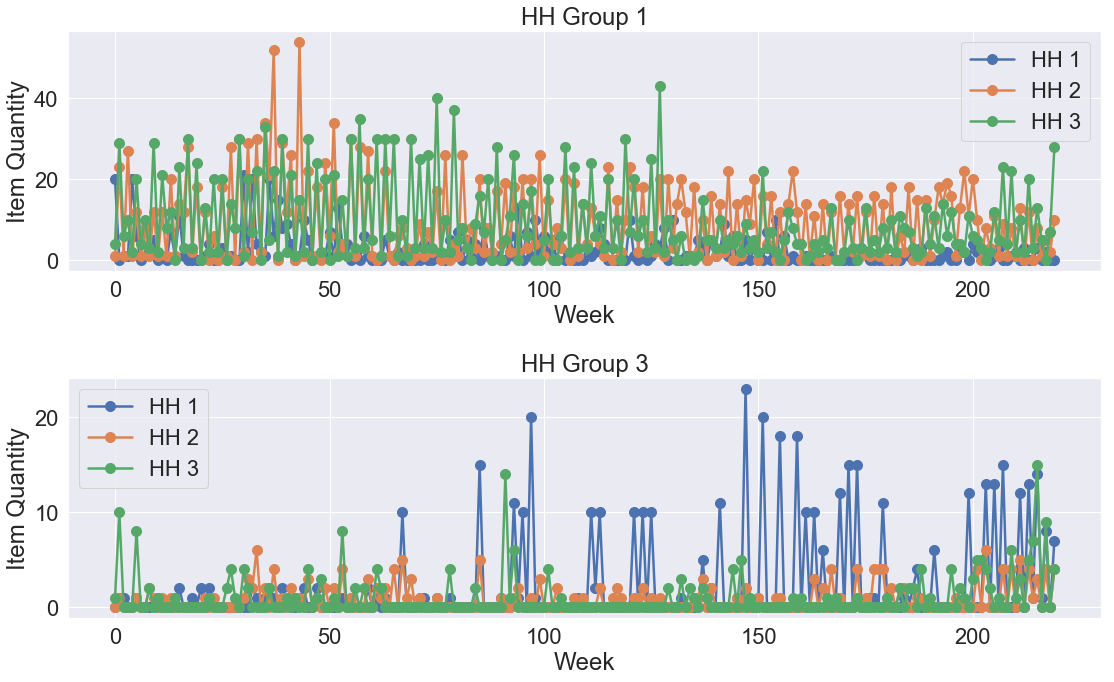

In [161]:
## Same plots at Category level
dfc1 = df_hh1.groupby(['HH','WEEK','CAT']).sum()[['ITEM_QTY', 'TOTAL_SPEND']].reset_index()
dfc1['RETURN'] = np.where(dfc1['ITEM_QTY'] > 0, 1, 0)

dfc3 = df_hh3.groupby(['HH','WEEK','CAT']).sum()[['ITEM_QTY', 'TOTAL_SPEND']].reset_index()
dfc3['RETURN'] = np.where(dfc3['ITEM_QTY'] > 0, 1, 0)

plt.figure(figsize = (16,10))
plt.subplot(2,1,1)
plt.title('HH Group 1')
plt.plot(dfc1['ITEM_QTY'][dfc1['HH'] == 2].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'HH 1')
plt.plot(dfc1['ITEM_QTY'][dfc1['HH'] == 10].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'HH 2')
plt.plot(dfc1['ITEM_QTY'][dfc1['HH'] == 100].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'HH 3')
plt.xlabel('Week')
plt.ylabel('Item Quantity')
plt.legend()
## HH group 3
plt.subplot(2,1,2)
plt.title('HH Group 3')
plt.plot(dfc3['ITEM_QTY'][dfc3['HH'] == 2].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'HH 1')
plt.plot(dfc3['ITEM_QTY'][dfc3['HH'] == 10].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'HH 2')
plt.plot(dfc3['ITEM_QTY'][dfc3['HH'] == 100].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'HH 3')
plt.xlabel('Week')
plt.ylabel('Item Quantity')
plt.legend()
plt.tight_layout()
fname = 'Plots/EDA-HHs-1item-Cat.png'
plt.savefig(fname)
plt.show()

One Household, Multiple Categories 

<Figure size 432x288 with 0 Axes>

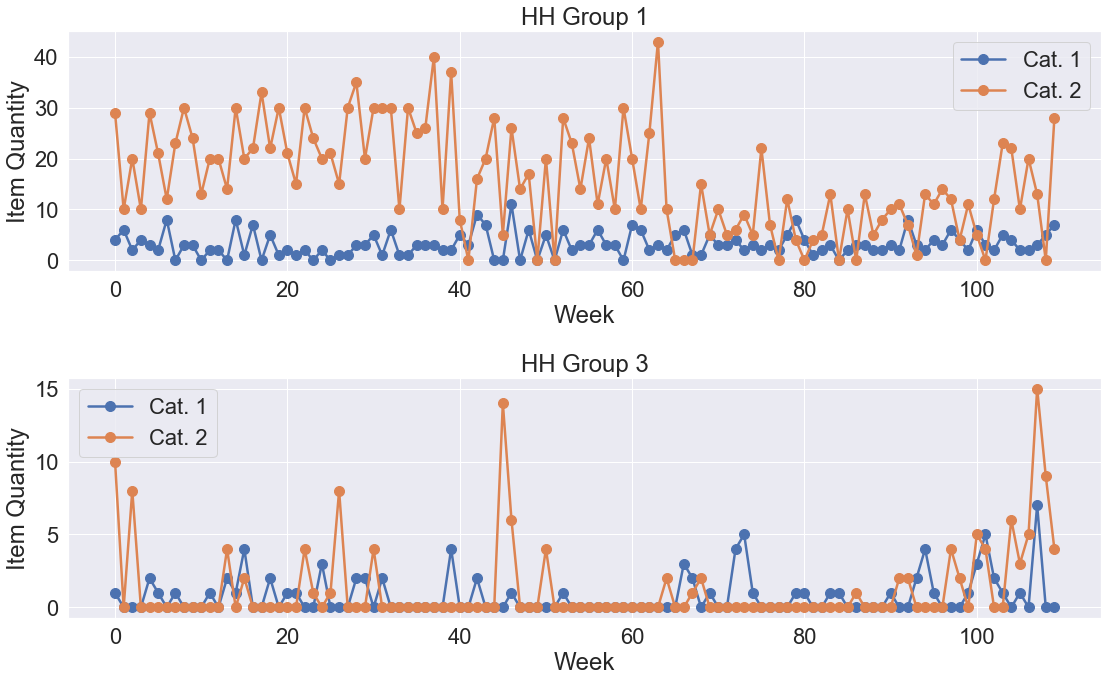

In [162]:
df_item1 = dfc1.loc[dfc1['HH'] == 100]
df_item3 = dfc3.loc[dfc3['HH'] == 100]

plt.figure()
plt.figure(figsize = (16,10))
plt.subplot(2,1,1)
plt.title('HH Group 1')
plt.plot(df_item1['ITEM_QTY'][df_item1['CAT'] == 1].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Cat. 1')
plt.plot(df_item1['ITEM_QTY'][df_item1['CAT'] == 2].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Cat. 2')
plt.xlabel('Week')
plt.ylabel('Item Quantity')
plt.legend()
## HH group 3
plt.subplot(2,1,2)
plt.title('HH Group 3')
plt.plot(df_item3['ITEM_QTY'][df_item3['CAT'] == 1].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Cat. 1')
plt.plot(df_item3['ITEM_QTY'][df_item3['CAT'] == 2].values, marker='o', 
        linewidth = 2.5, markersize = 10, label = 'Cat. 2')
plt.xlabel('Week')
plt.ylabel('Item Quantity')
plt.legend()
plt.tight_layout()
fname = 'Plots/EDA-Items-1HH-Cat.png'
plt.savefig(fname)
plt.show()

## Price Sensitive Households

In [163]:
df1 = df_hh1[(df_hh1['HH'] == 0) & (df_hh1['ITEM'] == 'A')]
df2 = df_hh1[(df_hh1['HH'] == 1) & (df_hh1['ITEM'] == 'A')]
df3 = df_hh1[(df_hh1['HH'] == 2) & (df_hh1['ITEM'] == 'A')]
df4 = df_hh1[(df_hh1['HH'] == 3) & (df_hh1['ITEM'] == 'A')]
df5 = df_hh1[(df_hh1['HH'] == 4) & (df_hh1['ITEM'] == 'A')]

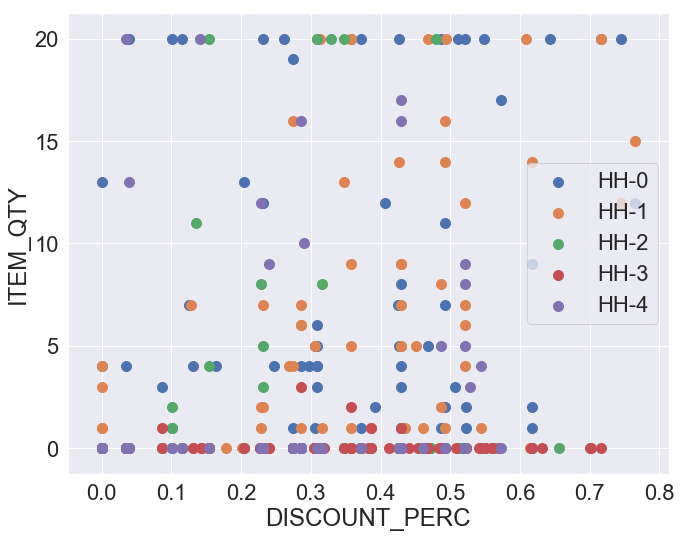

In [164]:
plt.figure(figsize = (10,8))
plt.scatter(df1['DISCOUNT_PERC'], df1['ITEM_QTY'], s = 100, label = 'HH-0')
plt.scatter(df2['DISCOUNT_PERC'], df2['ITEM_QTY'], s = 100, label = 'HH-1')
plt.scatter(df3['DISCOUNT_PERC'], df3['ITEM_QTY'], s = 100, label = 'HH-2')
plt.scatter(df4['DISCOUNT_PERC'], df4['ITEM_QTY'], s = 100, label = 'HH-3')
plt.scatter(df5['DISCOUNT_PERC'], df5['ITEM_QTY'], s = 100, label = 'HH-4')
plt.xlabel('DISCOUNT_PERC')
plt.ylabel('ITEM_QTY')
plt.legend()
plt.tight_layout()
fname = 'Plots/EDA-HH1-ITEMA-Price_Sensitive1.png'
plt.savefig(fname)
plt.show()
pass

In [165]:
df1 = df_hh1[(df_hh1['HH'] == 5) & (df_hh1['ITEM'] == 'A')]
df2 = df_hh1[(df_hh1['HH'] == 6) & (df_hh1['ITEM'] == 'A')]
df3 = df_hh1[(df_hh1['HH'] == 10) & (df_hh1['ITEM'] == 'A')]
df4 = df_hh1[(df_hh1['HH'] == 17) & (df_hh1['ITEM'] == 'A')]
df5 = df_hh1[(df_hh1['HH'] == 19) & (df_hh1['ITEM'] == 'A')]

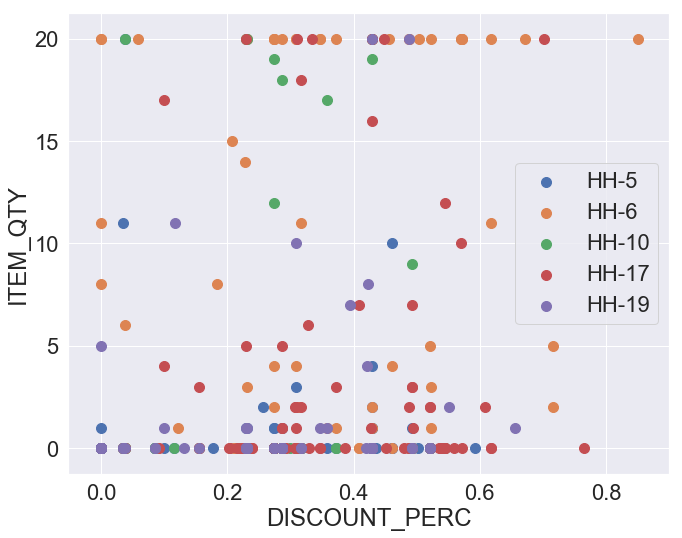

In [166]:
plt.figure(figsize = (10,8))
plt.scatter(df1['DISCOUNT_PERC'], df1['ITEM_QTY'], s = 100, label = 'HH-5')
plt.scatter(df2['DISCOUNT_PERC'], df2['ITEM_QTY'], s = 100, label = 'HH-6')
plt.scatter(df3['DISCOUNT_PERC'], df3['ITEM_QTY'], s = 100, label = 'HH-10')
plt.scatter(df4['DISCOUNT_PERC'], df4['ITEM_QTY'], s = 100, label = 'HH-17')
plt.scatter(df5['DISCOUNT_PERC'], df5['ITEM_QTY'], s = 100, label = 'HH-19')
plt.xlabel('DISCOUNT_PERC')
plt.ylabel('ITEM_QTY')
plt.legend()
plt.tight_layout()
fname = 'Plots/EDA-HH1-ITEMA-Price_Sensitive2.png'
plt.savefig(fname)
plt.show()
pass

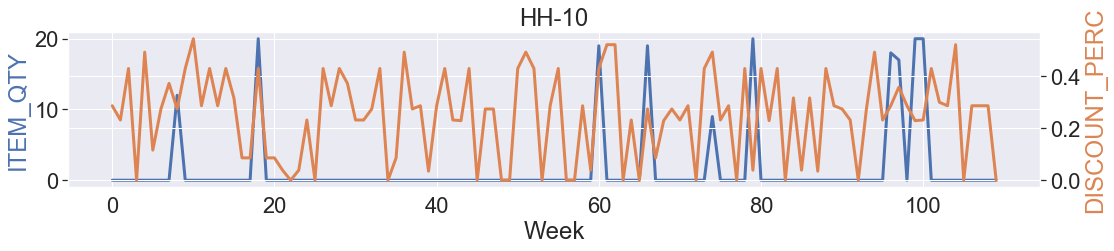

In [167]:
plt.figure(figsize = (16,4))
ax1 = plt.subplot()
plt.title('HH-10')
plt.plot(df3['ITEM_QTY'].values, linewidth=3, label = "ITEM_QTY", color = 'C0')
plt.xlabel('Week')
plt.ylabel('ITEM_QTY',color='C0')

ax2 = ax1.twinx()
ax2.plot(df3['DISCOUNT_PERC'].values, linewidth=3, label = 'DISCOUNT_PERC', color = 'C1')
plt.ylabel('DISCOUNT_PERC', color='C1')
plt.tight_layout()
fname = 'Plots/EDA-HH1-ITEMA-DISCOUNT_PERC-Increase-10.png'
plt.savefig(fname)
plt.show()

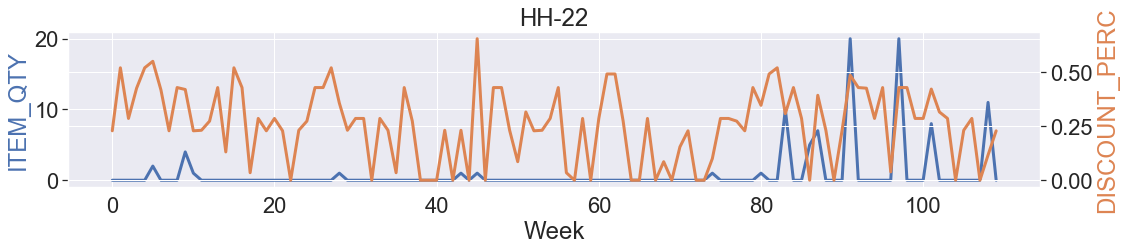

In [168]:
plt.figure(figsize = (16,4))
ax1 = plt.subplot()
plt.title('HH-22')
plt.plot(df5['ITEM_QTY'].values, linewidth=3, label = "ITEM_QTY", color = 'C0')
plt.xlabel('Week')
plt.ylabel('ITEM_QTY',color='C0')

ax2 = ax1.twinx()
ax2.plot(df5['DISCOUNT_PERC'].values, linewidth=3, label = 'DISCOUNT_PERC', color = 'C1')
plt.ylabel('DISCOUNT_PERC', color='C1')
plt.tight_layout()
fname = 'Plots/EDA-HH1-ITEMA-DISCOUNT_PERC-Increase-22.png'
plt.savefig(fname)
plt.show()
plt.show()

In [140]:
theta = np.zeros((2, len(idx)))
## Trend term 0
theta[0, 0] = np.random.normal(0, 1)
theta[1, 0] = np.random.normal(2, 1)
for t in range(1, len(idx)):
    theta[0, t] = 0.9*theta[0, t-1] + np.random.normal(0, 0.5, 10)
    theta[1, t] = theta[1, t-1] + np.random.normal(0, 0.3, 10)

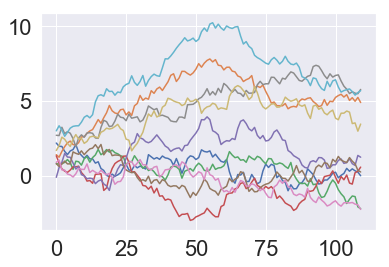

In [142]:
plt.plot(theta[:, 2, :].T)
pass